In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
import scipy.special
from sklearn.metrics import log_loss
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
n = 200
df = pd.DataFrame()
df['x1'] = np.random.randn(n)
df['x2'] = np.random.randn(n)
df['z'] = 0.0 + -1.0 * df.x1 + 1.0 * df.x2
df['p'] = scipy.special.expit(df.z)
df['y'] = scipy.stats.bernoulli.rvs(df.p)

Text(0, 0.5, '$\\beta_2$')

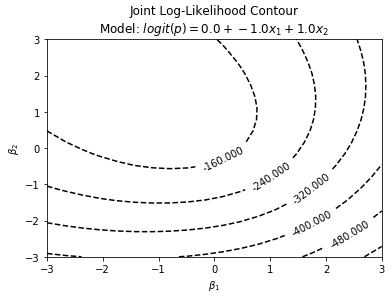

In [3]:
step = 20
b1 = np.linspace(-3, 3, step)
b2 = np.linspace(-3, 3, step)
B1, B2 = np.meshgrid(b1, b2)

ll = np.zeros((step, step))
for i in range(step):
    for j in range(step):
        pij = scipy.special.expit(0.0 + b1[i] * df.x1 + b2[j] * df.x2)
        ll[i][j] = np.sum(scipy.stats.bernoulli.logpmf(df.y, pij))
        
cont = plt.contour(B1, B2, ll.T, colors='k')
plt.clabel(cont)
plt.title('Joint Log-Likelihood Contour\nModel: $logit(p)=0.0+-1.0 x_1+1.0 x_2$')
plt.xlabel('$\\beta_1$')
plt.ylabel('$\\beta_2$')